What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
List the four regimes that characterize random networks as a function of ⟨k⟩.
According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import MaxNLocator


#First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each,
# average degree = 4, and rewiring probablity p=0,0.1, and 1. 
# Calculate the average shortest path length ⟨d⟩ for each one.

number_of_nodes = 50
average_degree = 4
p1,p2,p3 = 0, .1, 1

ws1 = nx.watts_strogatz_graph(number_of_nodes,average_degree,p1)
ws2 = nx.watts_strogatz_graph(number_of_nodes,average_degree,p2)
ws3 = nx.watts_strogatz_graph(number_of_nodes,average_degree,p3)

# average shortest path
asp1 = nx.average_shortest_path_length(ws1)
print(asp1)
asp2 = nx.average_shortest_path_length(ws2)
print(asp2)
asp3 = nx.average_shortest_path_length(ws3)
print(asp3)
# paths are short when p = 1 and they are long when p=0



6.63265306122449
3.590204081632653
2.8310204081632655


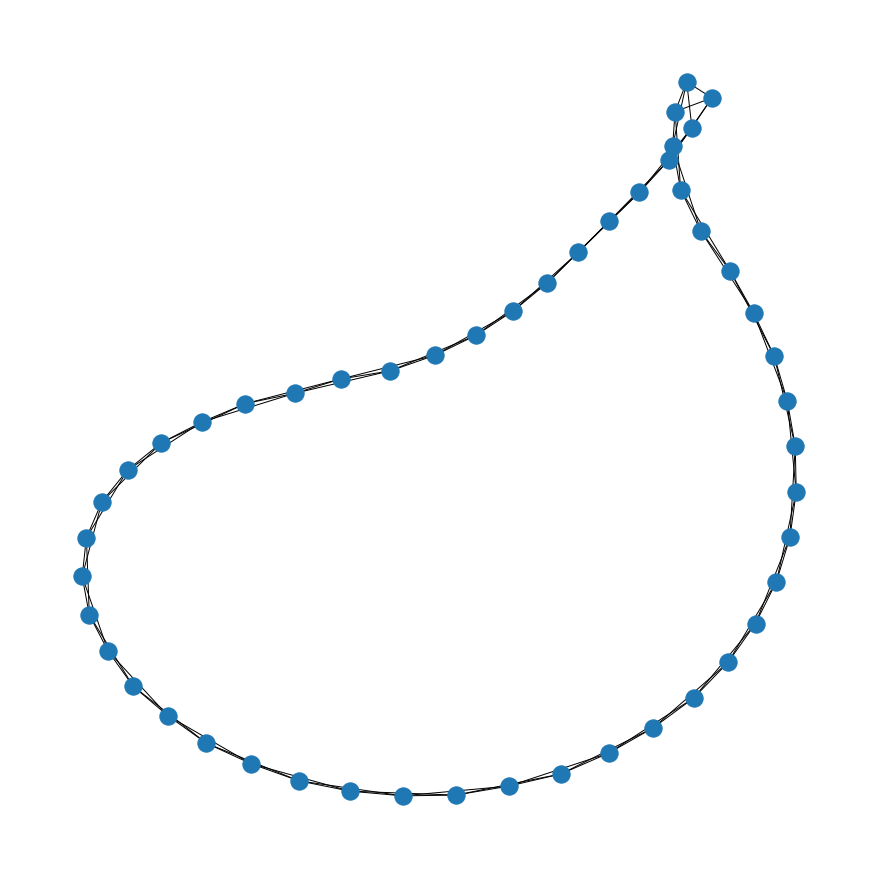

In [225]:
plt.figure(3,figsize=(12,12)) 
nx.draw(ws1)


[(0, 1), (0, 49), (0, 2), (0, 48), (1, 2), (1, 3), (1, 49), (2, 3), (2, 4), (3, 5), (3, 32), (4, 5), (4, 6), (4, 8), (5, 6), (5, 37), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (9, 11), (9, 20), (9, 34), (9, 35), (10, 11), (10, 40), (11, 12), (11, 13), (11, 33), (12, 14), (12, 45), (13, 14), (13, 15), (14, 15), (14, 28), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (17, 19), (18, 19), (18, 20), (19, 20), (19, 21), (20, 21), (20, 22), (21, 22), (21, 23), (22, 23), (22, 24), (23, 24), (23, 25), (24, 25), (24, 26), (25, 26), (25, 27), (26, 27), (26, 28), (27, 28), (27, 29), (28, 29), (28, 30), (29, 30), (29, 31), (30, 31), (30, 32), (31, 32), (31, 33), (32, 33), (32, 34), (33, 34), (34, 36), (34, 41), (35, 37), (36, 37), (36, 38), (37, 38), (37, 39), (38, 39), (38, 40), (39, 40), (39, 41), (39, 43), (40, 41), (40, 42), (41, 43), (42, 43), (42, 44), (43, 44), (44, 45), (44, 46), (45, 46), (45, 47), (46, 47), (46, 48), (47, 48), (47, 49), (48, 49)]


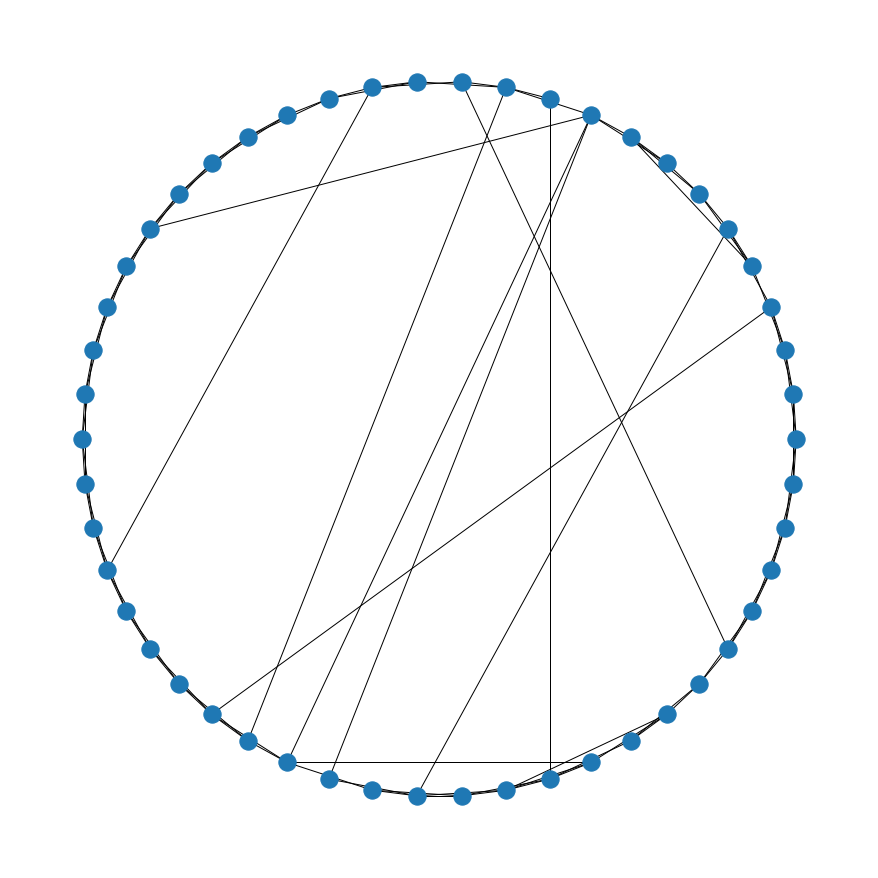

In [226]:
plt.figure(3,figsize=(12,12)) 
pos = nx.circular_layout(ws2)
nx.draw(ws2, pos)
print(ws2.edges)

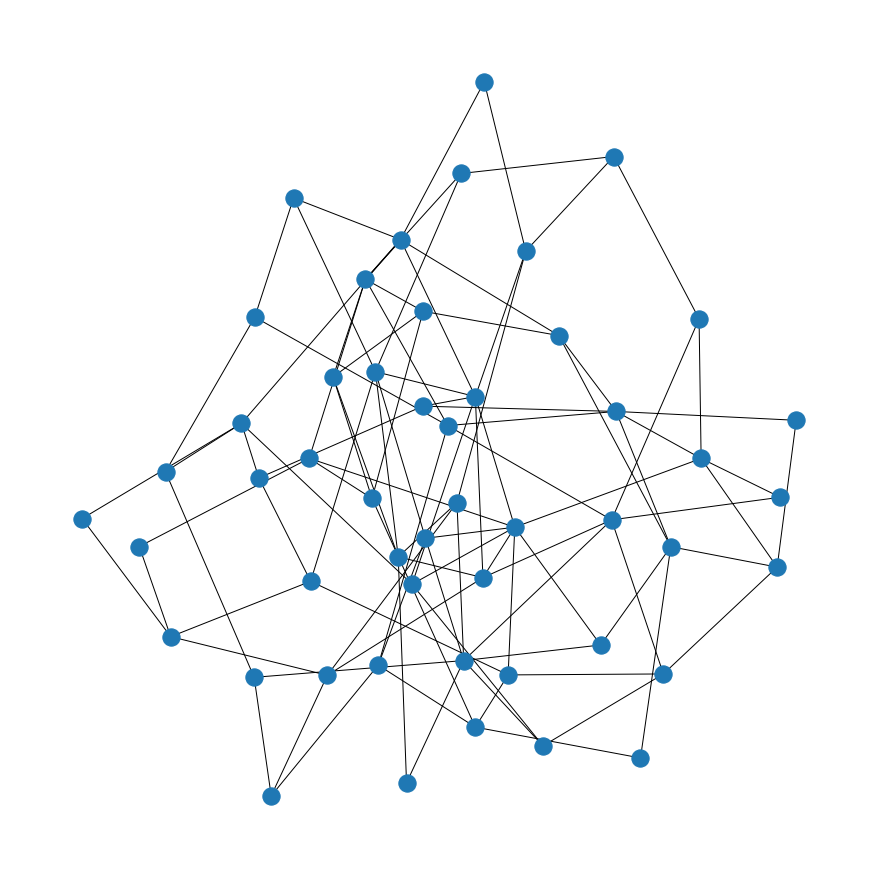

In [227]:
plt.figure(3,figsize=(12,12)) 
nx.draw(ws3)

Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [228]:
def createGraphs(no_graphs,no_nodes,k, p):
    
    total_avg_degree = []
    total_std_dev = []
    
    for i in range(len(p)):
        avg_degree = []
        for j in range(no_graphs):
            watts_strogatz = nx.watts_strogatz_graph(no_nodes, k, p[i])
            current_d = nx.average_shortest_path_length(watts_strogatz)            
            avg_degree.append(current_d)
        
        std_dev_avg_degree = np.std(avg_degree) 
        total_std_dev.append(std_dev_avg_degree)
        
        avg_avg_degree = np.mean(avg_degree)
        total_avg_degree.append(avg_avg_degree)

    
    plt.plot(p,total_avg_degree, 'r.--')
    plt.errorbar(p, total_avg_degree, total_std_dev, linestyle='None', marker='^')
    plt.show()
    
        
        
            
    #average shortest path length
    #standard deviation

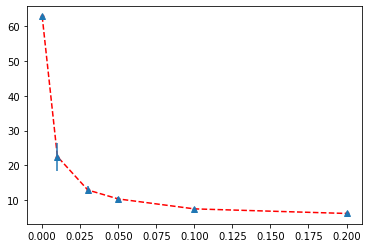

In [229]:
createGraphs(5,500,4,[0,0.01,0.03,0.05,0.1,0.2])

[0, 1]
2


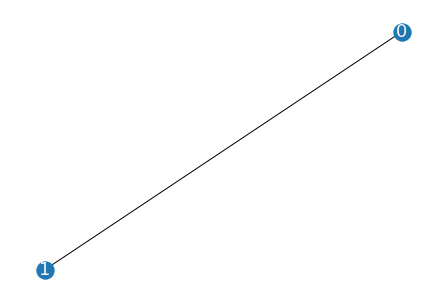

In [5]:
#Barabasi-Albert model

ba = nx.barabasi_albert_graph(2,1)

# Now add another node, connecting one of the existing nodes in proportion to their degree.

nx.draw(ba, with_labels = True, font_color="whitesmoke", font_size=18)



# G.add_edge(1, 2)
def addNodeProportion(graph, node, proportionNode):
    graph.add_node(node)
    graph.add_edge(node, proportionNode)
       

def getNodeProportion(edge_list):
    node = random.choice(edge_list)
    return node


def flattenList(l):
    flat_list = []    
    for sublist in l:
        for item in sublist:
            flat_list.append(item)            
    return flat_list


# edge list
no_nodes = ba.number_of_nodes()

edge_list = flattenList(ba.edges)

print(edge_list)
print(no_nodes)

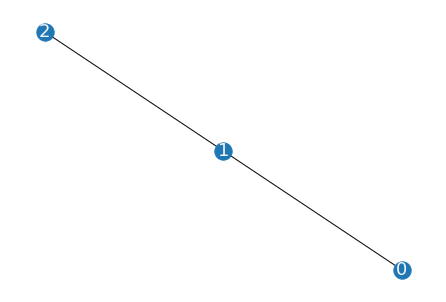

In [231]:
no_nodes = ba.number_of_nodes()
addNodeProportion(ba,no_nodes,getNodeProportion(edge_list))

nx.draw(ba, with_labels = True, font_color="whitesmoke", font_size=18)


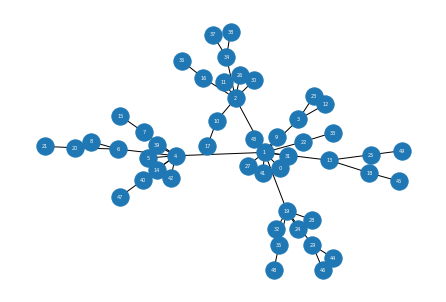

In [23]:
ba = nx.barabasi_albert_graph(50,1)

# Now add another node, connecting one of the existing nodes in proportion to their degree.

nx.draw(ba, with_labels = True, font_color="whitesmoke", font_size=5)


In [232]:
no_nodes = ba.number_of_nodes()
for i in range(5000):
    addNodeProportion(ba, i + no_nodes, getNodeProportion(flattenList(ba.edges)))

#nx.draw(ba, with_labels = True, font_color="whitesmoke", font_size=18)


143
1


Text(0, 0.5, '# of Nodes')

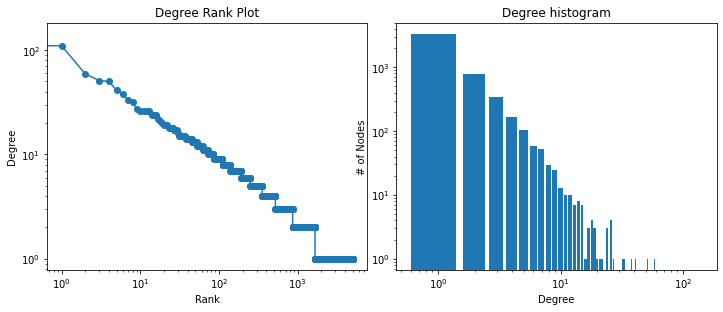

In [233]:
degree_sequence = sorted((d for n, d in ba.degree()), reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
#print(degree_sequence)

print(dmax)
print(dmin)

fig = plt.figure(3,figsize=(12,12)) 
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, marker="o")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

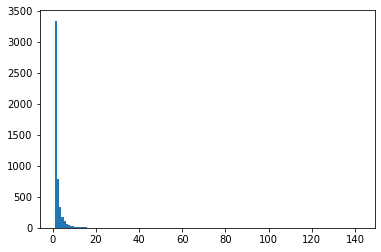

In [234]:
plt.hist(degree_sequence, bins=np.arange(min(degree_sequence), max(degree_sequence)))
#print(degree_sequence)

plt.show()

[   0    1    2 ... 5000 5001 5002]



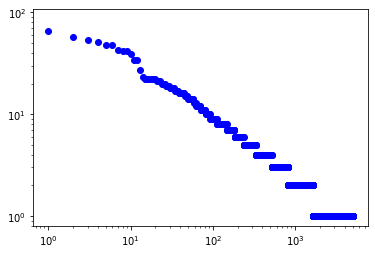

In [23]:
degree_count = np.arange(len(degree_sequence))

plt.scatter(degree_count, degree_sequence , c ="blue")
plt.xscale('log')
plt.yscale('log')
print(degree_count)
print()

In [69]:
# Exercises: The friendship paradox
from random import choice

random_node = getNodeProportion(flattenList(ba.edges))
print("picked node : ", random_node)

# first node degree level
random_node_degree = ba.degree(random_node)
print("*********** node degree: ", random_node_degree)

# graph of neighbors
neighbors = ba.neighbors(random_node)
print("neighboors ", neighbors)


neighbor_graph = ba.subgraph(neighbors)
neightbor_nodes = list(neighbor_graph.nodes)

print('neighboor nodes list ', neightbor_nodes)

nodes_degrees_dictionary = nx.average_neighbor_degree(ba)
#print(avg_friends_degrees)

friends_degrees = []

for i in range(len(neightbor_nodes)):
    friends_degrees.append(nodes_degrees_dictionary[neightbor_nodes[i]])
    
        
print("degree of only friends", friends_degrees)
print("************ average friends degrees ", np.mean(friends_degrees))


picked node :  3996
*********** node degree:  1
neighboors  <dict_keyiterator object at 0x0000020BA06E0040>
neighboor nodes list  [1059]
degree of only friends [5.0]
************ average friends degrees  5.0


In [4]:
# 1000 times
def friendshipParadox(graph):
        paradox = 0
        iterations = 1000
        
        for i in range(iterations):
            local_random_node = getNodeProportion(flattenList(graph.edges))
            #pick random node
            random_node_degree = graph.degree(local_random_node)
            # pick its neighbors
            neighbors = graph.neighbors(local_random_node)
            # find the subgraph
            neighbor_graph = graph.subgraph(neighbors)
            # get the list of nodes in subgraph
            neightbor_nodes = list(neighbor_graph.nodes)
            
            #dictionary of all graph
            nodes_degrees_dictionary = nx.average_neighbor_degree(graph)
            
            friends_degrees = []

            for i in range(len(neightbor_nodes)):
                friends_degrees.append(nodes_degrees_dictionary[neightbor_nodes[i]])
            
            total_degree = np.mean(friends_degrees)
            
            if(total_degree > random_node_degree):
                paradox += 1
                
        print(paradox, ' / ', iterations)


In [5]:
friendshipParadox(ba)

NameError: name 'ba' is not defined

In [ ]:
# friendship paradox pt 2


def createSequence():
    sequence = nx.utils.powerlaw_sequence(50, 1.5)
    final = []
    
    for i in range(len(sequence)):
        final.append(
            np.round(sequence[i],0)
        )
        
    final = np.array(final)
    #print(sum(final))
    
    if( (sum(final) % 2) != 0):
        final[0] += 1    
        
    #print(sum(final))
    return final.astype(int)

degree_sequence = createSequence()
#print(sum(degree_sequence))
#print(degree_sequence)
config = nx.configuration_model(degree_sequence)
G= nx.Graph(config) 
# remove parallel edges
G.remove_edges_from(list(nx.selfloop_edges(G)))

friendshipParadox(G)
#draw and show graph
#print(friendshipParadox(G))

In [16]:
# Sune network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import MaxNLocator

sune_network_2 = nx.Graph()
iterations = 5000

for j in range(iterations):
    n = sune_network_2.add_node(j)

for z in range(iterations):
    rand = random.choice(np.arange(iterations))
    addNodeProportion(sune_network_2, z, rand)

# SUNE NETWORK AVERAGE DEGREE
sune_avg_degree = 0

for i in range(iterations):
    sune_avg_degree += sune_network_2.degree[i]

sune_avg_degree = (sune_avg_degree / iterations)   
    
# getting the probability using p = <k> / (N-1)
p = sune_avg_degree / iterations


er_graph_2 = nx.erdos_renyi_graph(iterations, p)




Text(0, 0.5, '# of Nodes')

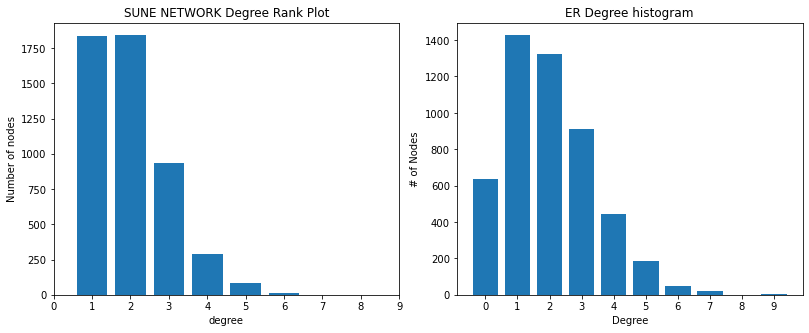

In [18]:
sune_degree_sequence = sorted((d for n, d in sune_network_2.degree()), reverse=True)
er_degree_sequence = sorted((d for n, d in er_graph_2.degree()), reverse=True)

fig = plt.figure(3,figsize=(13,13)) 
axgrid = fig.add_gridspec(5, 4)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.bar(*np.unique(sune_degree_sequence, return_counts=True))
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9], minor=False)
ax1.set_title("SUNE NETWORK Degree Rank Plot")
ax1.set_ylabel("Number of nodes")
ax1.set_xlabel("degree")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(er_degree_sequence, return_counts=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9], minor=False)
ax2.set_title("ER Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")